In [1]:
from numpy.fft import fftn,ifftn,fftshift,ifftshift,fftfreq
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def circavg(field,coords,bins):
    weights,edges = np.histogram(coords.flatten(), bins=bins)
    binav = np.histogram(coords.flatten(),bins=bins,weights=coords.flatten())[0]/weights
    return np.histogram(coords.flatten(),bins=bins,weights=field.flatten())[0]/weights, binav

In [3]:
def fft(X,L=1,a=0,b=2*np.pi,axes=None):
    if axes is None:
        axes = range(len(X.shape))
      
    if np.isscalar(L):
        L = [L]*len(axes)
    L = np.array(L)
    N = [X.shape[axis] for axis in axes]
    V = np.product(L)
    dx = np.array([float(l)/float(n) for l,n in zip(L,N)])
    Vx = V/np.product(N)
    
    ft = Vx*fftshift(fftn(X,axes=axes)) * np.sqrt(np.abs(b)/(2*np.pi)**(1-a))**len(axes)
    freq = np.array([fftshift(fftfreq(n,d=d)) for n,d in zip(N,dx)])*(2*np.pi/b)
    print Vx, np.sqrt(np.abs(b)/(2*np.pi)**(1-a))**len(axes), (2*np.pi/b)
    
    grid = freq[0]**2
    for i in range(len(axes)-1):
        grid = np.add.outer(grid,freq[i]**2)
        
    return ft, freq, np.sqrt(grid)

def ifft(X,Lk=1,a=0,b=2*np.pi,axes=None):
    if axes is None:
        axes = range(len(X.shape))
      
    if np.isscalar(Lk):
        Lk = [Lk]*len(axes)
    Lk = np.array(Lk)
    N = [X.shape[axis] for axis in axes]
    
    V = np.product(Lk)
    dk = np.array([float(lk)/float(n) for lk,n in zip(Lk,N)])
    Vk = np.product(dk)
    
    #print Lk,N, V, dk, Vk
    print V, np.sqrt(np.abs(b)/(2*np.pi)**(1+a))**len(axes), (2*np.pi/b)
    
    ft = V*ifftn(ifftshift(X),axes=axes) * np.sqrt(np.abs(b)/(2*np.pi)**(1+a))**len(axes)
    
    freq = np.array([fftshift(fftfreq(n,d=d)) for n,d in zip(N,dk)])*(2*np.pi/b)
    
    grid = freq[0]**2
    for i in range(len(axes)-1):
        grid = np.add.outer(grid,freq[i]**2)
        
    return ft, freq, np.sqrt(grid)

## Test Round-Trip

### Setup

In [27]:
N = 1000
L = 10.
dx = L/N
x = np.arange(-L/2 , L/2,dx)[:N]
print len(x), x.max(),x.min()
X,Y = np.meshgrid(x,x)

a_squared = 1

fx = np.exp(-np.pi*a_squared*(X**2+Y**2))

1000 4.99 -5.0


### Unitary, Ordinary Frequency

In [28]:
a,b = 0 , 2*np.pi
Fx,freq,grid = fft(fx,L=L,a=a,b=b)

Lk = -2*np.min(freq)
fx_,x_,_ = ifft(Fx,Lk=Lk,a=a,b=b)
print "Maximum Difference (centre lies at 1): ", np.max(np.real((fx_-fx)))
print "Maximum Difference in grid: ", np.max(x_[0]-x)

0.0001 1.0 1.0
10000.0 1.0 1.0
Maximum Difference (centre lies at 1):  1.55431223448e-15
Maximum Difference in grid:  2.13162820728e-13


### Unitary, Angular Freq.

In [26]:
a,b = 0 ,1
Fx,freq,grid = fft(fx,L=L,a=a,b=b)

Lk = -2*np.min(freq)
fx_,x_,_ = ifft(Fx,Lk=Lk,a=a,b=b)
print "Maximum Difference (centre lies at 1): ", np.max(np.real((fx_-fx)))
print "Maximum Difference in grid: ", np.max(x_[0]-x)

NameError: name 'fx' is not defined

### Non-Unitary, Angular Freq.

In [155]:
a,b = 1. ,1.
Fx,freq,grid = fft(fx,L=L,a=a,b=b)

Lk = -2*np.min(freq)
fx_,x_,_ = ifft(Fx,Lk=Lk,a=a,b=b)
print "Maximum Difference (centre lies at 1): ", np.max(np.real((fx_-fx)))
print "Maximum Difference in grid: ", np.max(x_[0]-x)

[ 0.01  0.01]
[ 628.31853072  628.31853072] [1000, 1000] 394784.176044 [ 0.62831853  0.62831853] 0.394784176044
Maximum Difference (centre lies at 1):  1.60982338571e-15
Maximum Difference in grid:  2.13162820728e-13


## Test Forward Transform

We are trying to make sure of the following (from Wikipedia, specifically 401):

<img src="2d_fourier_wiki.jpg">

### Setup

In [56]:
N = 1000
x = np.linspace(-10,10,N)
X,Y = np.meshgrid(x,x)

a_squared = 1

fx = np.exp(-np.pi*a_squared*(X**2+Y**2))

### unitary, ordinary frequency

[ 0.01  0.01]


(1e-21, 1000.0)

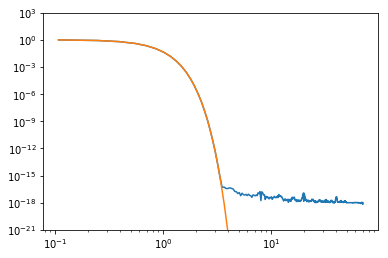

In [156]:
a,b = 0, 2*np.pi

Fx,freq,grid = fft(fx,L=L,a=a,b=b)
Fx_anl_fc = lambda k : (1./a_squared) * np.exp(-np.pi*k**2/a_squared)

# Analytic transform
Fx_anl = Fx_anl_fc(grid)

Fx_circ, bins = circavg(np.abs(Fx),grid,int(N/2.2))
Fx_anl_circ = circavg(Fx_anl,grid,int(N/2.2))[0]

# Numerical beam transform
plt.plot(bins,Fx_circ)
plt.plot(bins,Fx_anl_circ)
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-21,1e3)

### Unitary, Angular Frequency

[ 0.01  0.01]


(1e-21, 1000.0)

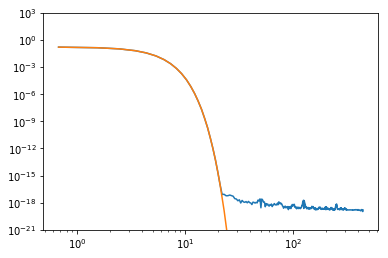

In [157]:
a,b = 0, 1.

Fx,freq,grid = fft(fx,L=L,a=a,b=b)
Fx_anl_fc = lambda k : 1./(2*np.pi*a_squared) * np.exp(-(1./(4*np.pi))*k**2/a_squared)

# Analytic transform
Fx_anl = Fx_anl_fc(grid)

Fx_circ, bins = circavg(np.abs(Fx),grid,int(N/2.2))
Fx_anl_circ = circavg(Fx_anl,grid,int(N/2.2))[0]

# Numerical beam transform
plt.plot(bins,Fx_circ)
plt.plot(bins,Fx_anl_circ)
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-21,1e3)

### Non-unitary, Angular Frequency

[ 0.01  0.01]


(1e-21, 1000.0)

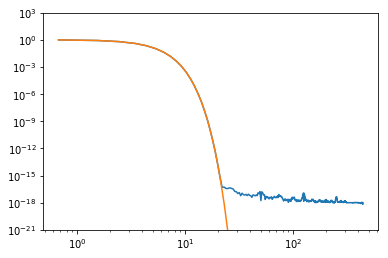

In [158]:
a,b = 1,1

Fx,freq,grid = fft(fx,L=L,a=a,b=b)
Fx_anl_fc = lambda k : (1./a_squared) * np.exp(-k**2/(4*np.pi*a_squared))

# Analytic transform
Fx_anl = Fx_anl_fc(grid)

Fx_circ, bins = circavg(np.abs(Fx),grid,int(N/2.2))
Fx_anl_circ = circavg(Fx_anl,grid,int(N/2.2))[0]

# Numerical beam transform
plt.plot(bins,Fx_circ)
plt.plot(bins,Fx_anl_circ)
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-21,1e3)

## Test mixed round-trip

Here we test a mixed round-trip. That is, given a forward transform with parameters $a,b$ and an inverse transform with parameters $a',b'$, doing a forward-then-backward transform should yield:

$$ \left( \frac{b'}{b(2\pi)^{a'-a}}\right)^{n/2} f\left(\frac{b'r}{b}\right), $$

and doing it the other way should yield:

$$ \left( \frac{b}{b'(2\pi)^{a'-a}}\right)^{n/2} F\left(\frac{bk}{b'}\right), $$


### Setup

In [165]:
N = 1000
L = 10.
dx = L/N
x = np.arange(-L/2 , L/2,dx)[:N]

alpha = np.pi
fx = np.exp(-alpha*x**2)

### Unitary -- Ordinary/Angular Freq

Let the forward transform have $(a,b) = (0,2\pi)$ and the backward transform have $(a',b') = (0,1)$, then the forward-then-back transform for a 1D problem should be:

$$ f(r/(2\pi))/ \sqrt{2\pi}, $$

and the backward-then-forward should be

$$ \sqrt{2\pi} F(2\pi k). $$

[ 0.01]
[ 100.] [1000] 100.0 [ 0.1] 0.1


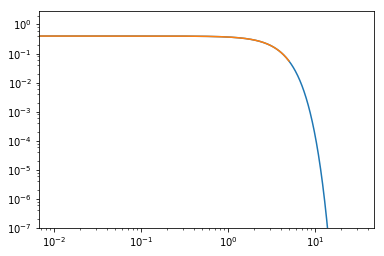

In [174]:
# Forward-then-back

a,b = 0 , 2*np.pi
Fk,freq,grid = fft(fx,L=L,a=0,b=2*np.pi)

Lk = -2*np.min(freq)

fx_,x_,_ = ifft(Fk,Lk=Lk,a=0,b=1)
#fx_,bins = circavg(fx_,grid,200)

plt.plot(x_[0],fx_)
plt.plot(x,np.exp(-np.pi*(x/(2*np.pi))**2)/np.sqrt(2*np.pi))
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-7,3)
plt.show()

10.0 0.398942280401 6.28318530718
0.628318530718 1.0 1.0


(1e-08, 50)

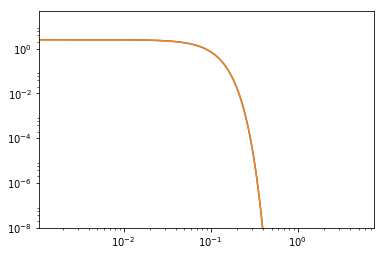

In [205]:
# Back-then-forward

N = 1000
Lk = 10.
dk = Lk/N
k = np.arange(-Lk/2 , Lk/2,dk)[:N]

alpha = np.pi
Fk = np.exp(-alpha*k**2)


fx,x,_ = ifft(Fk,Lk=Lk,a=0,b=1)
Fk_,k_,_ = fft(fx,-2*np.min(x),a=0,b=2*np.pi)

plt.plot(k_[0],Fk_)
#plt.plot(k,Fk)
plt.plot(k,np.sqrt(2*np.pi)*np.exp(-alpha*((2*np.pi)*k)**2))
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-8,50)

### Unitary -- Ordinary/Angular Freq, 2D

Let the forward transform have $(a,b) = (0,2\pi)$ and the backward transform have $(a',b') = (0,1)$, then the forward-then-back transform for a 2D problem should be:

$$ \frac{1}{2\pi}f\left(\frac{r}{2\pi}\right), $$

and the backward-then-forward should be

$$ 2\pi F(2\pi k). $$

0.0001 1.0 1.0
10000.0 0.159154943092 6.28318530718


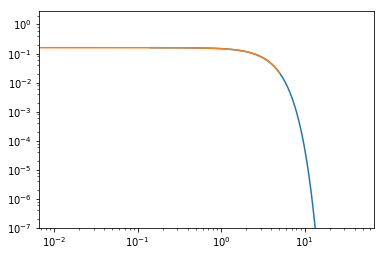

In [224]:
# Forward-then-back
N = 1000
L = 10.
dx = L/N
x = np.arange(-L/2 , L/2,dx)[:N]
X,Y = np.meshgrid(x,x)

a_squared = 1
fx = np.exp(-np.pi*a_squared*(X**2+Y**2))


a,b = 0 , 2*np.pi
Fk,freq,grid = fft(fx,L=L,a=0,b=2*np.pi)
Lk = -2*np.min(freq)
fx_,x_,xgrid = ifft(Fk,Lk=Lk,a=0,b=1)


fx_,bins = circavg(fx_,xgrid,200)

plt.plot(bins,fx_)
plt.plot(x,np.exp(-np.pi*(x/(2*np.pi))**2)/(2*np.pi))
#plt.plot(bins,np.exp(-np.pi*bins**2))
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-7,3)
plt.show()

100.0 0.159154943092 6.28318530718
0.394784176044 1.0 1.0


(1e-08, 50)

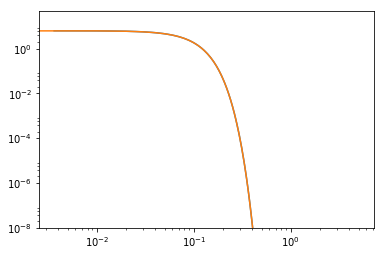

In [223]:
# Back-then-forward

N = 1000
Lk = 10.
dk = Lk/N
k = np.arange(-Lk/2 , Lk/2,dk)[:N]
KX,KY = np.meshgrid(k,k)

alpha = np.pi
Fk = np.exp(-alpha*(KX**2+KY**2))


fx,x,xgrid = ifft(Fk,Lk=Lk,a=0,b=1)
Fk_,k_,kgrid = fft(fx,-2*np.min(x),a=0,b=2*np.pi)

Fk_,bins = circavg(Fk_,kgrid,200)

plt.plot(bins,Fk_)
#plt.plot(k,Fk)
plt.plot(k,2*np.pi*np.exp(-alpha*((2*np.pi)*k)**2))
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-8,50)

In [229]:
fftfreq(20,d=2)

array([ 0.   ,  0.025,  0.05 ,  0.075,  0.1  ,  0.125,  0.15 ,  0.175,
        0.2  ,  0.225, -0.25 , -0.225, -0.2  , -0.175, -0.15 , -0.125,
       -0.1  , -0.075, -0.05 , -0.025])

In [5]:
from hmf import MassFunction
from scipy.interpolate import InterpolatedUnivariateSpline as spline
import numpy as np
from old_powerbox import LogNormalPowerBox as _LNPB, PowerBox as _PB
from powerbox import LogNormalPowerBox, PowerBox
from powerbox.fft import fft,ifft,fftfreq
from powerbox import get_power
from old_powerbox import get_power as _get_power

# Set up a MassFunction instance to access its cosmological power-spectrum
mf = MassFunction(z=0)

# Generate a callable function that returns the cosmological power spectrum.
spl = spline(np.log(mf.k),np.log(mf.power),k=2)
power = lambda k : np.exp(spl(np.log(k)))

# Create the power-box instance. The boxlength is in inverse units of the k of which pk is a function, i.e.
# Mpc/h in this case.
lnpb = LogNormalPowerBox(N=128, dim=3, pk = power, boxlength= 100.,seed=1234,a=1.,b=1.)
_lnpb = _LNPB(N=128, dim=3, pk = power, boxlength= 100.,seed=1234)

pb = PowerBox(N=128, dim=3, pk = power, boxlength= 100.,seed=1234,a=0,b=2*np.pi)
_pb = _PB(N=128, dim=3, pk = power, boxlength= 100.,seed=1234)

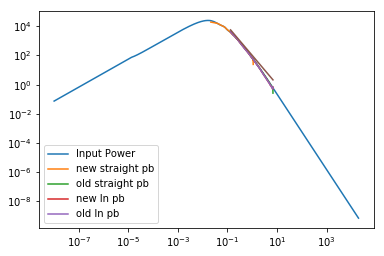

In [13]:

p_k, kbins = get_power(pb.delta_x,pb.boxlength,a=0,b=2*np.pi)
_p_k, _kbins = _get_power(_pb.delta_x,_pb.boxlength)

lnp_k, lnkbins = get_power(lnpb.delta_x,lnpb.boxlength,a=1.,b=1.)
_lnp_k, _lnkbins = _get_power(_lnpb.delta_x,_lnpb.boxlength)

plt.plot(mf.k,mf.power,label="Input Power")
plt.plot(kbins,p_k,label="new straight pb")
plt.plot(_kbins,_p_k,label="old straight pb")

plt.plot(lnkbins,lnp_k,label="new ln pb")
plt.plot(_lnkbins,_lnp_k,label="old ln pb")
plt.plot(lnkbins,100*lnkbins**-2.)

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

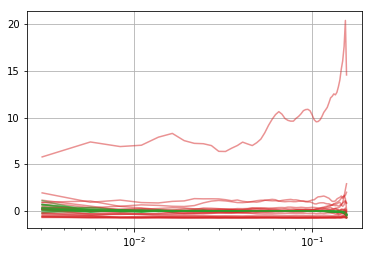

In [9]:
p_k = [0]*20
lnp_k = [0]*20
for i in range(20):
    lnpb = LogNormalPowerBox(N=128, dim=3, pk = lambda u : 100.*u**-2., boxlength= 700.,a=0,b=2*np.pi)
    pb = PowerBox(N=128, dim=3, pk = lambda u : 100.*u**-2., boxlength= 700.,a=0,b=2*np.pi)
    p_k[i], kbins = get_power(pb.delta_x,pb.boxlength,a=0,b=2*np.pi)
    lnp_k[i], lnkbins = get_power(lnpb.delta_x,lnpb.boxlength,a=0,b=2*np.pi)

anl = 100.*kbins**-2.
for i in range(20):
    plt.plot(kbins,(p_k[i]-anl)/anl,color="C2",alpha=0.5)
    plt.plot(lnkbins,(lnp_k[i]-anl)/anl,color="C3",alpha=0.5)
#plt.plot(kbins,100.*kbins**-2.,label="Input Power",lw=2,color="C1")

plt.grid(True)
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.show()

In [22]:
dx = np.exp(np.random.normal(size=10000,scale=2)-2)
np.mean(dx)

1.0063715261040009

In [6]:
a = np.linspace(0,1,6)

In [7]:
b = [a[i] for i in range(6)]

In [8]:
a[1] = 10

In [4]:
a[1,1] = 10

In [10]:
i,j,n = 2,4,5
n*i + j if j<i else n*j+i

22

In [9]:
b

[0.0,
 0.20000000000000001,
 0.40000000000000002,
 0.60000000000000009,
 0.80000000000000004,
 1.0]

In [5]:
b

array([ 0.        ,  0.06666667,  0.13333333,  0.2       ,  0.26666667,
        0.33333333,  0.4       ,  0.46666667,  0.53333333,  0.6       ,
        0.66666667,  0.73333333,  0.8       ,  0.86666667,  0.93333333,  1.        ])